In [1]:
import pandas as pd

df = pd.read_csv('/kaggle/input/screen-time-tracker-90days/screen_time_tracker_90days.csv')
df.head()

,Date,Phone_hrs,Laptop_hrs,Total_hrs,Purpose,Productivity,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,1-Sep,3.2,8.2,11.4,studying,10.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Weekday
1,2-Sep,2.0,4.5,6.5,studying,8.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Weekday
2,3-Sep,5.2,7.5,12.6,studying,7.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Weekday
3,4-Sep,2.6,6.5,9.1,studying,10.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Weekday
4,5-Sep,3.0,4.6,7.6,work,9.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Weekday


In [2]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()

,Date,Phone_hrs,Laptop_hrs,Total_hrs,Purpose,Productivity
0,1-Sep,3.2,8.2,11.4,studying,10.0
1,2-Sep,2.0,4.5,6.5,studying,8.0
2,3-Sep,5.2,7.5,12.6,studying,7.0
3,4-Sep,2.6,6.5,9.1,studying,10.0
4,5-Sep,3.0,4.6,7.6,work,9.0


In [3]:
X = df[['Phone_hrs', 'Laptop_hrs', 'Total_hrs']]
y = df['Productivity']

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
df['Productivity'].isna().sum()

np.int64(1)

In [9]:
df = df.dropna(subset=['Productivity'])

In [10]:
X = df[['Phone_hrs', 'Laptop_hrs', 'Total_hrs']]
y = df['Productivity']

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.2631578947368421
              precision    recall  f1-score   support

         4.0       0.00      0.00      0.00         3
         5.0       0.00      0.00      0.00         0
         6.0       0.00      0.00      0.00         1
         7.0       0.25      0.25      0.25         4
         8.0       0.18      1.00      0.31         2
         9.0       0.50      0.20      0.29         5
        10.0       1.00      0.25      0.40         4

    accuracy                           0.26        19
   macro avg       0.28      0.24      0.18        19
weighted avg       0.41      0.26      0.24        19



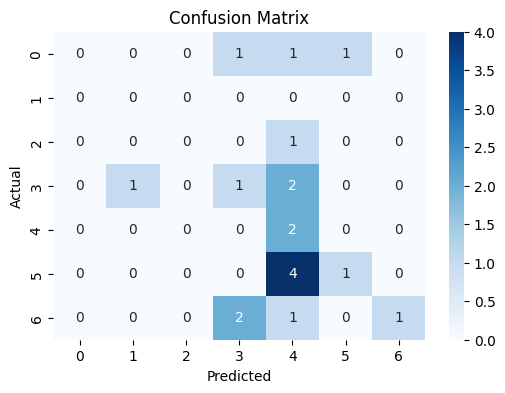

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()